# Install libraries:

In [ ]:
#install library
%%capture

!pip3 install --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip3 install --upgrade aiohttp_socks

# nest_asyncio 
!pip install nest_asyncio

In [ ]:
#import libraries
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from zipfile import ZipFile
import json

Mounted at /content/drive


In [ ]:
#add brandprocessed data
brandsprocessed3 = pd.read_csv('drive/Shareddrives/capstone_prayap_nithyara/brandslistfinal_data.csv')
brandsprocessed=list(brandsprocessed3['0'])
brandsprocessed[:10]

['the original dessert hummus',
 'liketoknowit',
 'jofama  fashion',
 'opullence paris',
 'hellobody italia',
 'keep nature wild',
 'littlewoods',
 'mary kay de mxico oficial',
 'the may fair',
 'evogue']

# Collecting data:

In [ ]:
#import libraries
import twint
import nest_asyncio
import pandas as pd
nest_asyncio.apply()
from datetime import date, timedelta

### Fetch Tweets functions:

In [ ]:
#create a function to fetch tweets
def fetchtweets(sinceDate, untilDate,brands):	
  since = str(sinceDate)
  until = str(untilDate)
  df1=pd.DataFrame()
  i=0
  for brand in brands:
    i=i+1
    try:
      c = twint.Config()
      c.Retries_count = 10
      c.Search = brand
      c.Pandas = True
      c.Since = since
      c.Until = until
      c.User_full = True # also fetching full user profile data.
      c.Lowercase = True
      c.User_full = True
      c.Filter_retweets = True
      c.Lang = "en"
      c.Hide_output = True
      print("* Fetching tweets created for " + since + str(brand))
      print(i)
      twint.run.Search(c)
      #interest_df11.to_csv('interest5_data.csv')
      df = twint.storage.panda.Tweets_df
      df['brand']=brand
      df1=df1.append(df)
      print(len(df))
      print(len(df1))
    except:
      df=pd.DataFrame()
      print("brand_where_it_failed"+ str(brand))
      print(i)
      return(df1)
      exit("failed")
  return(df1)


In [ ]:
# Fetching tweets between dates
def tweetsbetweendates(beginDate, endDate,brand):
  if (type(beginDate) is not date) | (type(endDate) is not date):
    return print("Error: Please supply `beginDate` and `endDate` in `datetime.date` format.")
  else:
    df=fetchtweets(beginDate, endDate,brand)
    df.to_csv('brandstweets_data1.csv')
    !cp brandstweets_data1.csv "drive/Shareddrives/capstone_prayap_nithyara/twitter2/"

## Fetch data:

In [ ]:
#need to input begin date and end date and enter the number of brands to be processed. 
#Only works with 1000 brands at a time and had to wait for 15 minutes or so in between.
#also ran for preand post periods
beginDate = date(2018, 7, 1)
endDate = date(2018, 9, 30)
tweetsbetweendates(beginDate, endDate,brandsprocessed[1000:2000])

* Fetching tweets created for 2018-07-01blue bell
1
brand_where_it_failedblue bell
1


**TWITTER DATA**

# Combine data in Google Drive project folder:

> Indented block



In [ ]:
#import os
import os
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content/drive/Shareddrives/capstone_prayap_nithyara/twitter': ['brandstweets_data4.csv', 'brandstweets_data5.csv', 'brandstweets_data6.csv', 'brandstweets_data7.csv', 'brandstweets_data8.csv', 'brandstweets_data9.csv', 'brandstweets_data11.csv', 'brandstweets_data10.csv', 'brandstweets_data15.csv', 'brandstweets_data12.csv', 'brandstweets_data16.csv', 'brandstweets_data13.csv', 'brandstweets_data17.csv', 'brandstweets_data25.csv', 'brandstweets_data18.csv', 'brandstweets_data26.csv', 'brandstweets_data19.csv', 'brandstweets_data27.csv', 'brandstweets_data20.csv', 'brandstweets_data28.csv', 'brandstweets_data21.csv', 'brandstweets_data29.csv', 'brandstweets_data22.csv', 'brandstweets_data30.csv', 'brandstweets_data31.csv', 'brandstweets_data33.csv', 'brandstweets_data32.csv', 'brandstweets_data35.csv', 'brandstweets_data34.csv', 'brandstweets_data36.csv', 'unused data']


In [ ]:
#import libraries
import os
import glob
import pandas as pd
copied_path2 = "/content/drive/Shareddrives/capstone_prayap_nithyara/twitter2"
os.chdir(copied_path2)
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f,lineterminator='\n') for f in all_filenames ])
#export to csv
combined_csv.to_csv( "alltweets2.csv", index=False, encoding='utf-8-sig')
!cp alltweets2.csv "/content/drive/Shareddrives/capstone_prayap_nithyara/twitter2"

cp: 'alltweets.csv' and '/content/drive/Shareddrives/capstone_prayap_nithyara/twitter/alltweets.csv' are the same file


In [ ]:
#read data
df3=pd.read_csv("/content/drive/Shareddrives/capstone_prayap_nithyara/twitter/alltweets.csv")


In [ ]:
#using groupby to get total number of tweets
df4=df3.groupby(['brand']).size().reset_index()
df4.head()

,brand,0
0,arctic power berries,8
1,axaaa,40
2,a,160
3,a a,160
4,a igrab cafe,2


In [ ]:
#rename column
df4.rename(columns={0:'total'},inplace=True)


In [ ]:
#looking for brands with tweets greater than 200
df5=df4[df4['total']>200]
df5.head()

,brand,total
88,a r c h,432
105,abc7ny,240
139,acquario di genova,320
402,amour rose,394
409,amys kitchen,240


In [ ]:
#sorting tweets by brand
df6=df5.sort_values('total',ascending=False).head(10)
df6

,brand,total
9737,zach king,502
9718,your tea,480
9611,wonderful places,480
4634,kildare village,480
6449,onehope wine,480
8210,stetson,480
4267,jed north apparel,464
6669,partake foods,440
88,a r c h,432
3772,hey honey,400


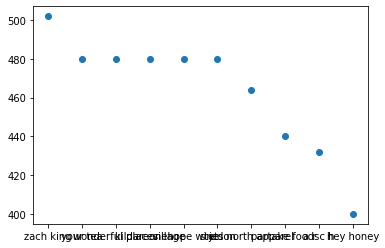

In [ ]:
#plot brand and total tweets for brands with tweets greater than 200
import matplotlib.pyplot as plt
plt.scatter(x=df6['brand'],y=df6['total'])
plt.show()

In [ ]:
#only getting certian variables
df7=df3[['created_at','tweet','hashtags','user_id','user_id_str','username','brand']]

In [ ]:
#import brand dataset
brands = pd.read_csv('drive/Shareddrives/capstone_prayap_nithyara/influencers_sponsored_mentioning_brand_merge.csv')

In [ ]:
#import brand data
brands1 = pd.read_csv('drive/Shareddrives/capstone_prayap_nithyara/brands_data.csv')

In [ ]:
#join using merge
brand_join2=combined.merge(df4,how='left', left_on='brand', right_on='brand')

In [ ]:
#fill nan with 0
brand_join2=brand_join2.fillna(0)

In [ ]:
#extract only brand name and total tweets
brand_join2=brand_join2[['Name','total']]

In [ ]:
#rename column
brand_join2.rename(columns={'total':'num_tweets'},inplace=True)

In [ ]:
#merge with brands
final=brands.merge(brand_join2,how='left', left_on='Name', right_on='Name')

In [ ]:
#save file to drive
final.to_csv( "influencers_sponsored_mentioning_brand_merge_alltweets.csv", index=False, encoding='utf-8-sig')
!cp influencers_sponsored_mentioning_brand_merge_alltweets.csv "/content/drive/Shareddrives/capstone_prayap_nithyara"